In [5]:
from IPython.core.display import HTML
from string import Template
def jsConfig():
    src = """
    <script>require.config({ baseUrl: 'https://rawgit.com/kompgraf/course-material/master/assets/' });</script>
    """
    return HTML(src)
def addScript(script, identifier):
    src = Template("""
    <div id="${identifier}-container"></div>
    <script>require(['${script}'], main => main($$("#${identifier}-container"), '${identifier}'));</script>
    """)
    return HTML(src.substitute(script = script, identifier = identifier))
jsConfig()


# Primál subdivision-felületek

## Bevezetés

Hasonlóan a paraméteres görbékhez, lépjünk dimenziót a subdivision-görbék esetén is! Azaz nézzük meg, hogyan lehet a subdivision alapötlet segítségével felületeket előállítani. Ahelyett, hogy $\gamma(s, t)$ kétváltozós, vektorértékű függvénnyel leírt felületeket és kontrollpontokat használnánk a modellezéshez, induljunk ki egy durva, kezdeti meshből! Ezen sorozatos finomításokat végrehajtva, egyre finomabb és finomabb meshek jönnek létre, melyek tartanak egy sima meshez. Praktikusan ez azt jelenti, hogy kiindulva egy alacsonyszámú csúcsot tartalmazó meshből, finomítások egymásutánját végrehajtva, egy sima, folytonos mesht kapunk. 

Természetesen, akárcsak a subdivision görbék esetén, ezúttal is számos különböző séma áll rendelkezésünkre, azonban a folyamat lényege az összes módszert tekintve azonos. Ebben a jegyzetben áttekintjük a *subdivision zoo* lakóit, és részletesebben megvizsgálunk néhány, úgynevezett primál subdivision eljárást.

## Általános elvárások és jellemzők

Az alapötlet rendkívül egyszerű, azonban ahhoz, hogy olyan sémákat tudjunk kialakítani, melyek valóban sima felületeket generálnak, ennél az alapdefiníciónál egy kicsit többre van szükség. A subdivision során új csúcsokat illesztünk a meshbe, ezzel növelve a részletességet. Hogyan képezzük azonban ezeket a csúcsokat? Nyilvánvalóan ez egy kulcskérdés hiszen ettől függ, hogy a finomítások eredményeként valóban egy folytonos felületet kapunk. Nézzünk meg néhány irányelvet, melyet érdemes szem előtt tartanunk egy új séma kialakítása során.

  * Elvárt, hogy a séma **hatékony** legyen, azaz minél kevesebb művelet legyen szükséges egy új csúcs helyének meghatározásához. Ez garantálja, hogy a felületpontok számítása gyorsan elvégezhető.
  * A módszer legyen **lokális**, tehát az új csúcsok kiszámításához ne kelljen a mesh *távoli* pontjait felhasználni.
  * Szintén a lokalitással kapcsolatos elvárás, hogy egy adott csúcs a létrejövő, végső mesh minél kisebb részére legyen befolyással. Ez az úgynevezett **compact support** tulajdonság.
  * A séma **egyszerű** volta is fontos, azaz a szabályok legyenek előre meghatározva, és a lehető legkevesebb legyen belőlük.

A felsoroltakon túl kívánatos még az **affin invariancia** és valamilyen mértékű **folytonosság** teljesítése is.

### Finomítás

A subdivision-felületeket tárgyaló jegyzetekben olyan sémákkal fogunk foglalkozni, melyek kétfázisú finomítást alkalmaznak. Az első, úgynevezett *split* fázis új csúcsokat, éleket és lapokat képez. Az ezt követő *smoothing* fázis az eredeti csúcsok pozícóját módosítja. Ez utóbbi fázis opcionális, interpoláló sémák esetén elhagyásra kerül.

## Subdivision Zoo

Az elmúlt évtizedekben rengeteg sémát alkottak meg, melyek különböző jellemzőkkel, előnyökkel és hátrányokkal bírnak. Mivel ezek a sémák rendkívül sokfélék (szinte kaotikusak), akár egy állatkert lakói, összefoglalóan *subdivision zooként* hivatkozhatunk rájuk. 

### Primál subdivision

A jegyzet további részében három módszer fog terítékre kerülni, melyek más és más tulajdonságokkal rendelkeznek, azonban (a $\sqrt{3}$ kivételével) mindegyikük úgynevezett *primál subdivision*.

Az ilyen típusú eljárások a *split* fázis során a meglevő lapokból új lapokat képeznek, így az egymásutáni finomítások alkalmával létrejövő lapok fákba szervezhetőek. Az eredeti mesh minden lapjából képezhető egy fa, melynek gyökerében az adott lap áll, gyermekei pedig a következő finomítás által belőle képzett új lapok. Minden iteráció egy újabb szintet ad hozzá a fához.

Fontos kiemelni, hogy egyszerűsítésként a továbbiakban csak olyan esetekkel fogunk foglalkozni, amikor egyfelől a mesh zárt, másfelől éles ráncokat, gyűrődéseket nem szeretnénk megtartani.

### Loop Subdivision

A Loop Subdivision séma egy approximáló eljárás, mely háromszög-lapokból képzett mesheken alkalmazható. Nézzük meg, hogy milyen lépésekből áll egy finomítás!

#### 1. Edge Point Insertion

Elsőként minden él segítségével képzünk egy új csúcsot, ezek az úgynevezett *edge point*ok.

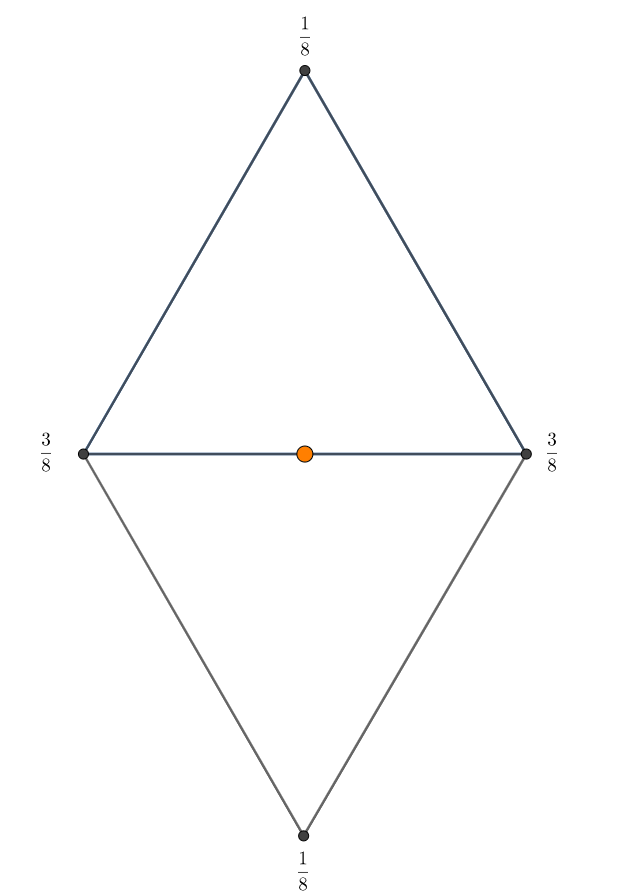

Az él két végpontját $\frac{3}{8}$-$\frac{3}{8}$ súllyal vesszük figyelembe, míg az élt határoló két lap átellenes csúcsai $\frac{1}{8}$ súllyal játszanak szerepet.

#### 2. Face Split

Az új csúcsok hozzáadása után a lapok feldarabolása következik, melynek során eredeti mesh minden lapjából $4$ új lapot képzünk.

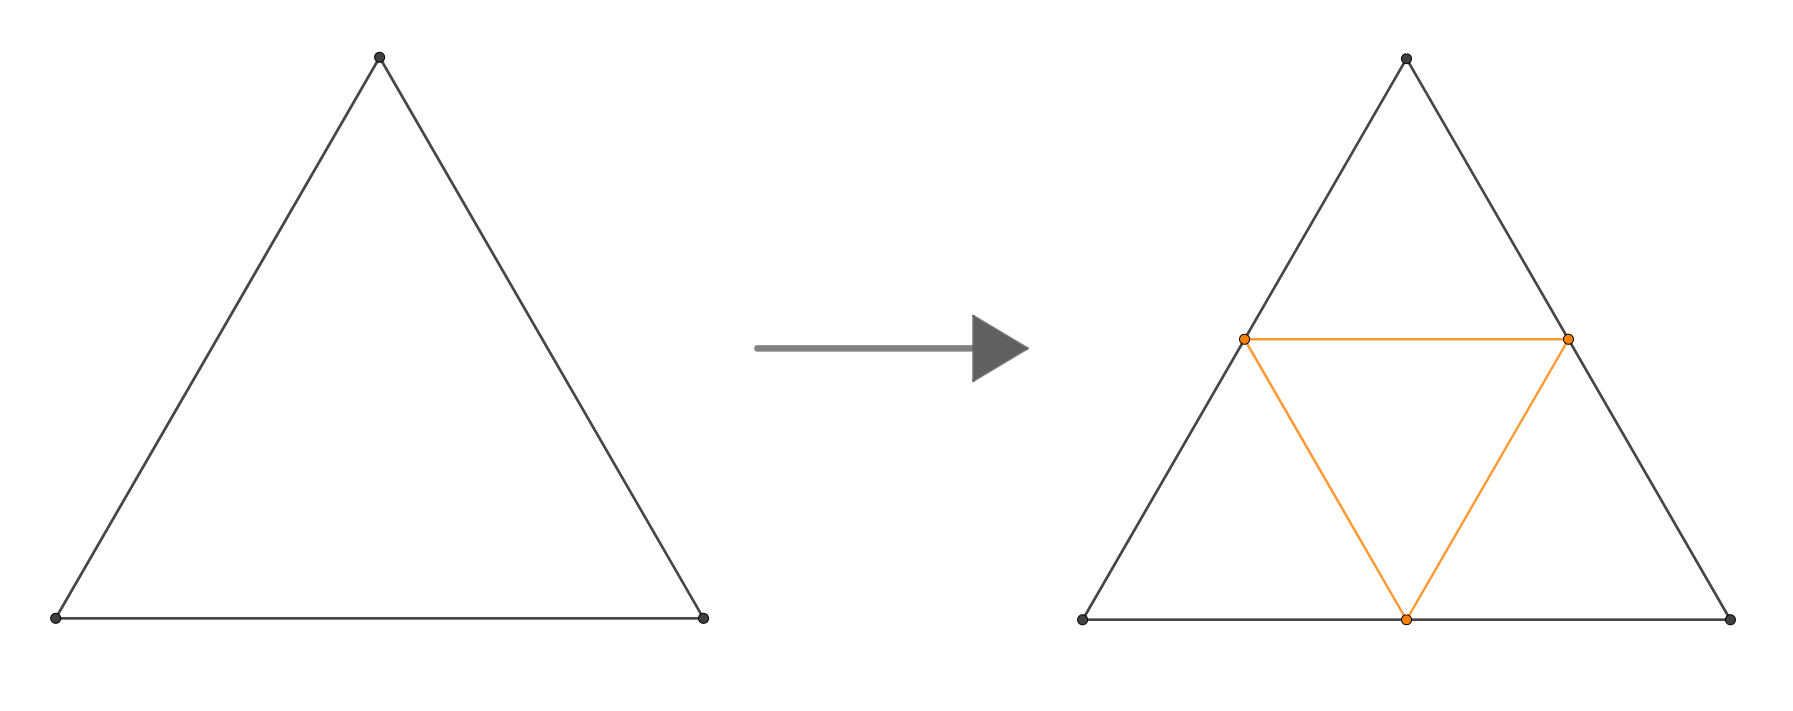

#### 3. Vertex Perturbation

Az utolsó lépést az eredeti csúcsok elmozdítása jelenti, mely a szomszédok átlagolásával történik. Minden csúcs esetén vesszük az adott csúcs és  a szomszédos csúcsok pozícióinak kombinációját, és az így kapott pozícióra mozgatjuk el a csúcsot. Ezt a műveletet az újonnan képzett csúcsokra *nem* hajtjuk végre.

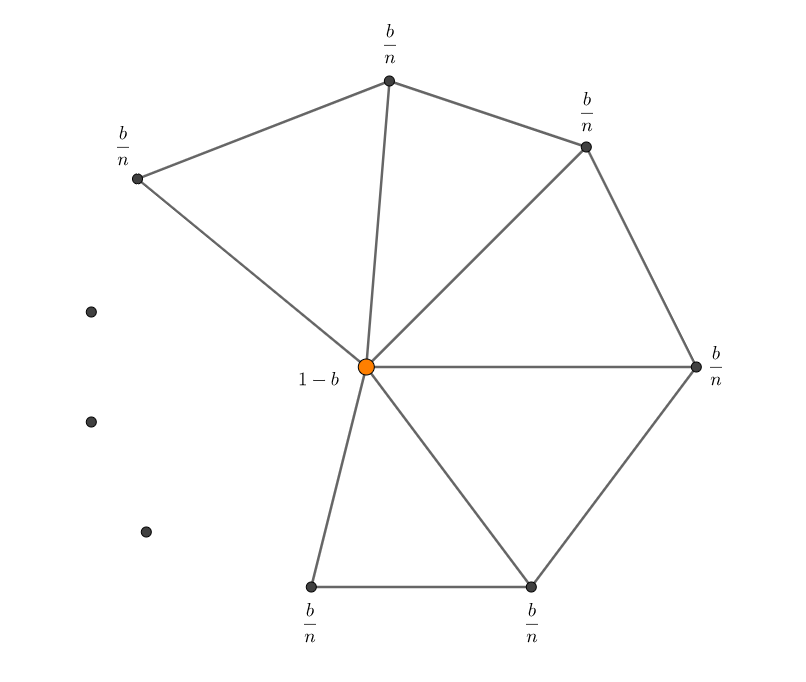

#### Demonstráció

A demonstráció egy kockán mutatja a a Loop Subdivision működését. A kamerát ugyanúgy irányíthatjuk, mint a [Bézier-felület](http://nbviewer.jupyter.org/github/kompgraf/course-material/blob/master/notebooks/hf-03-bezier-felulet/hf-03-bezier-felulet.ipynb#Demonstráció) esetében, finomítást pedig a <kbd>Enter</kbd> billentyű leütésével hajthatunk végre.

In [6]:
addScript('js/loop-subdivision', 'loop-subdivision')

### Catmull-Clark Subdivision

Míg a Loop kizárólag háromszögekre alkalmazható, addig a Catmull-Clark tetszőleges sokszögekből képzett mesheken használható. A létrejövő mesh azonban már egy finomítás után is kizárólag négyszög-lapokból fog állni. Hasonlóan a Loophoz, ez az eljárás is minden eredeti lapból $4$ új lapot hoz létre, approximáló mesheket generálva.

#### 1. Centroids

Az első lépés a lapok súlypontjának hozzáadása. Az ábrán négy eredeti lap szerepel, melyek az egyszerűség kedvéért mind négyszögek, ezeknek képezzük a narancssárgával jelölt súlypontját.

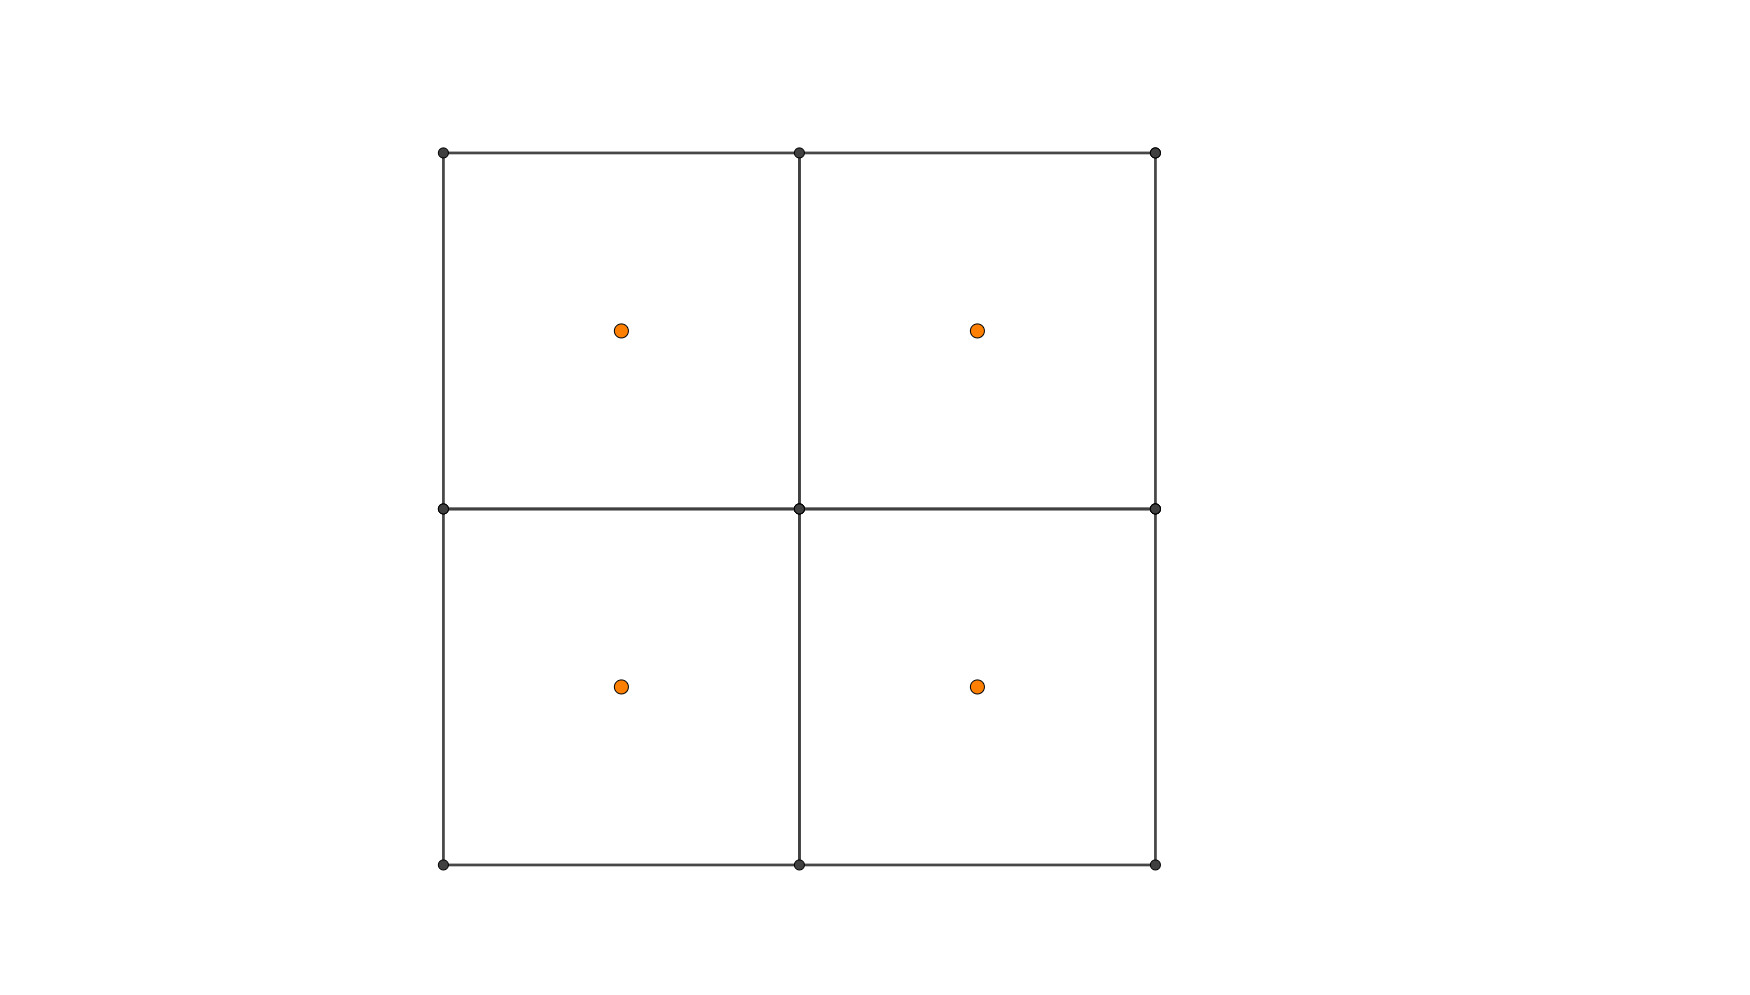

#### 2. Edge Points

Ezt követi az *edge point*ok hozzáadása, melyeket minden él esetén az adott él két végpontja és az élt határoló két lap súlypontja segítségével képzünk:

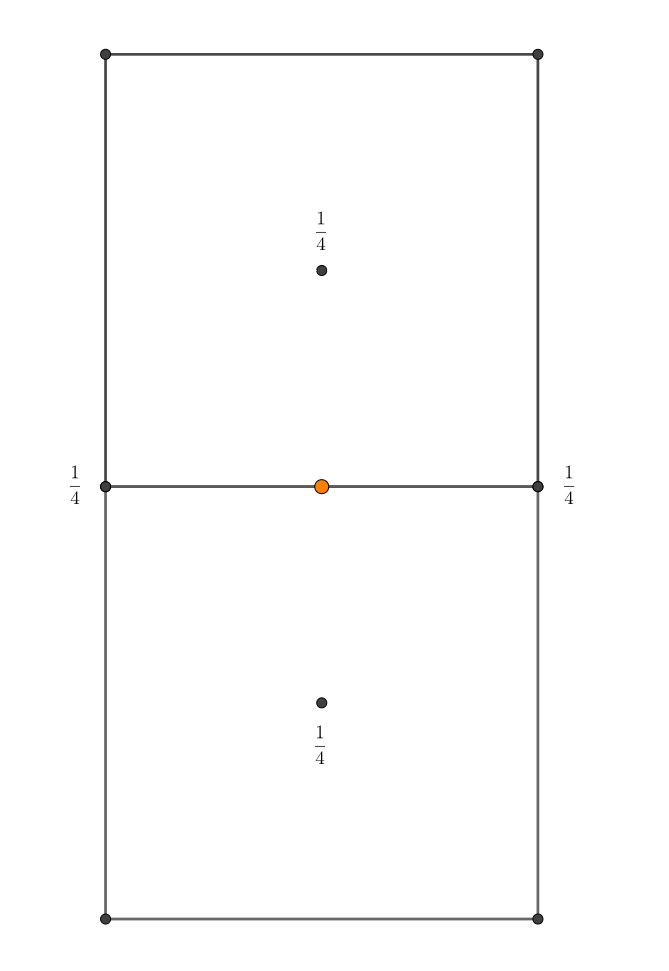

Ezek előállítása után a következő csúcsokkal rendelkezünk:

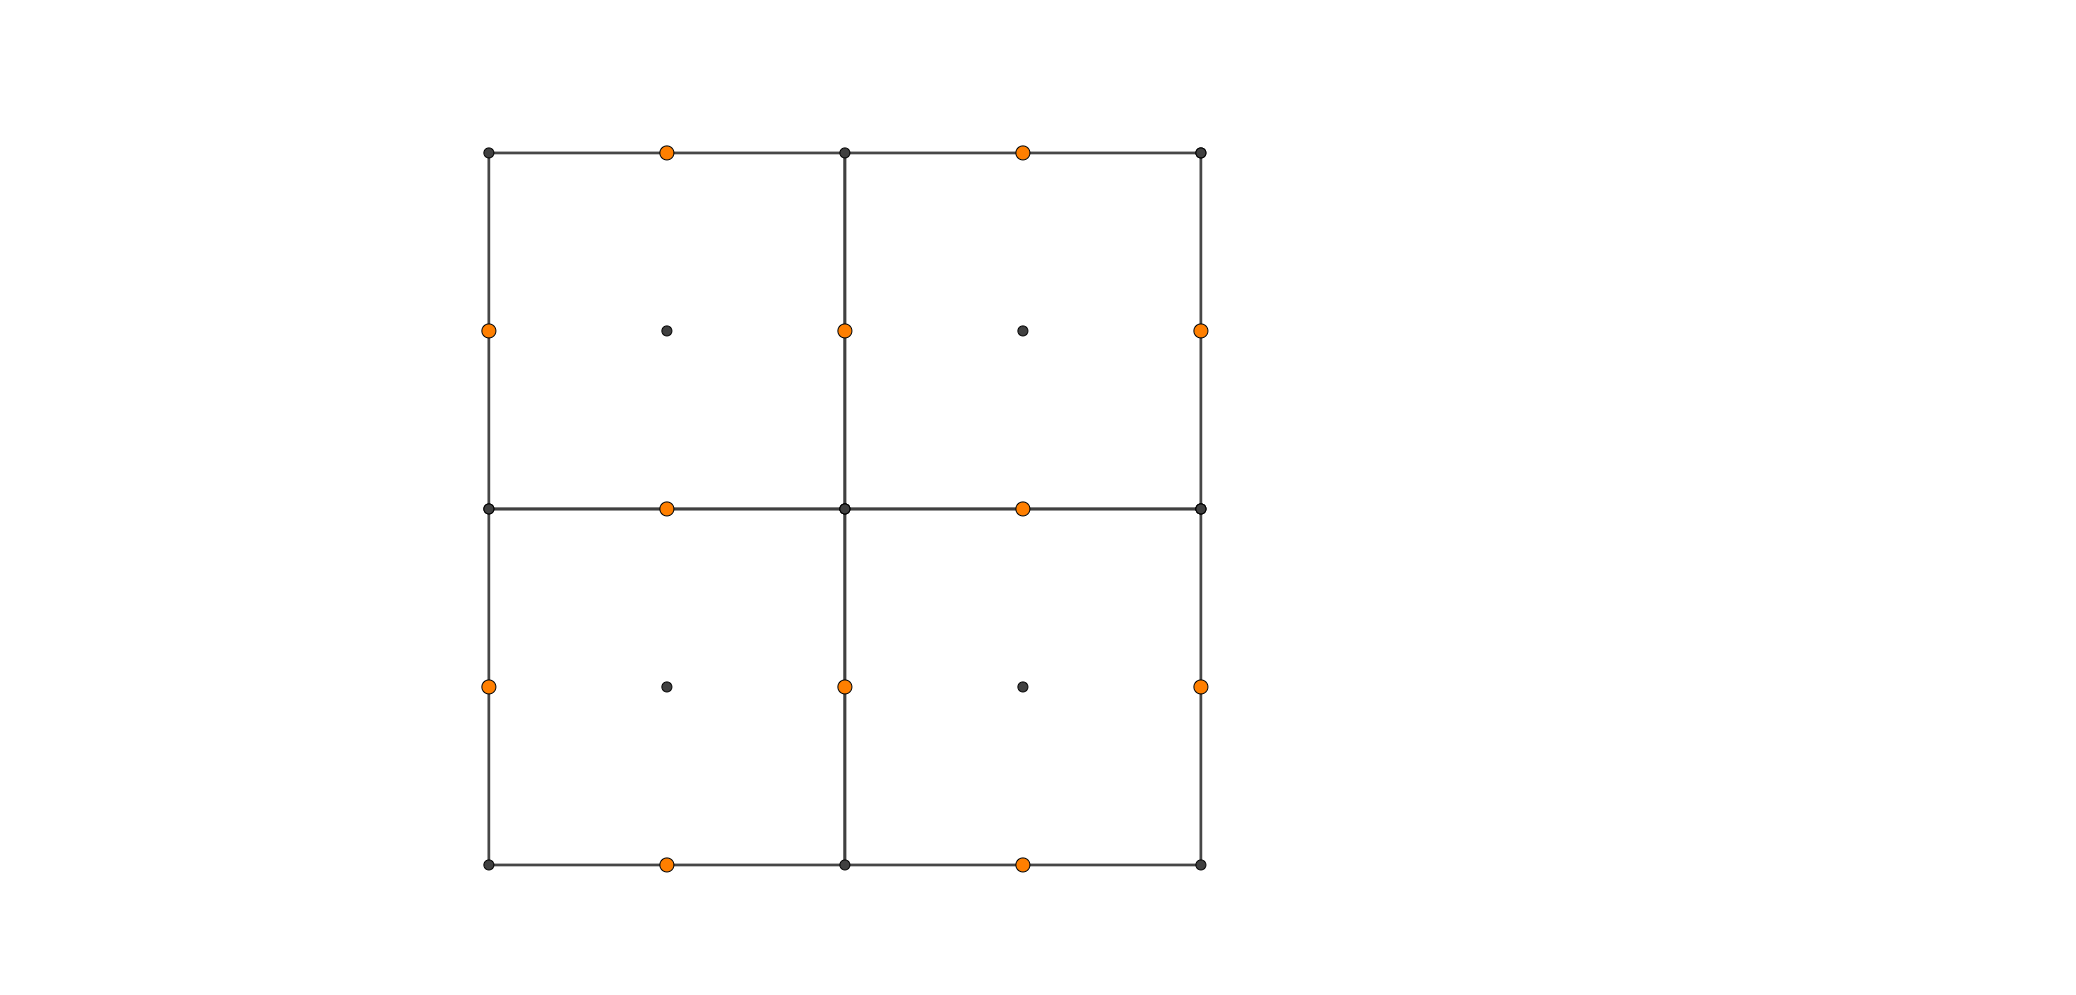

#### 3. Vertex Points

A mesht alkotó eredeti csúcsokat is el kell mozdítanunk, az előző lépések során generált *face point*ok és *edge point*ok átlaga segítségével. Az ábrán a naracssárga csúcsok a face pointok, a zöld csúcsok az edge pointok.

A régi csúcs új pozíciója úgy fog kialakulni, hogy vesszük a szomszédos face pointok átlagát, valamint a szomszédos edge pointok átlagát, és hozzáadjuk az eredeti csúcs pozíciójához.

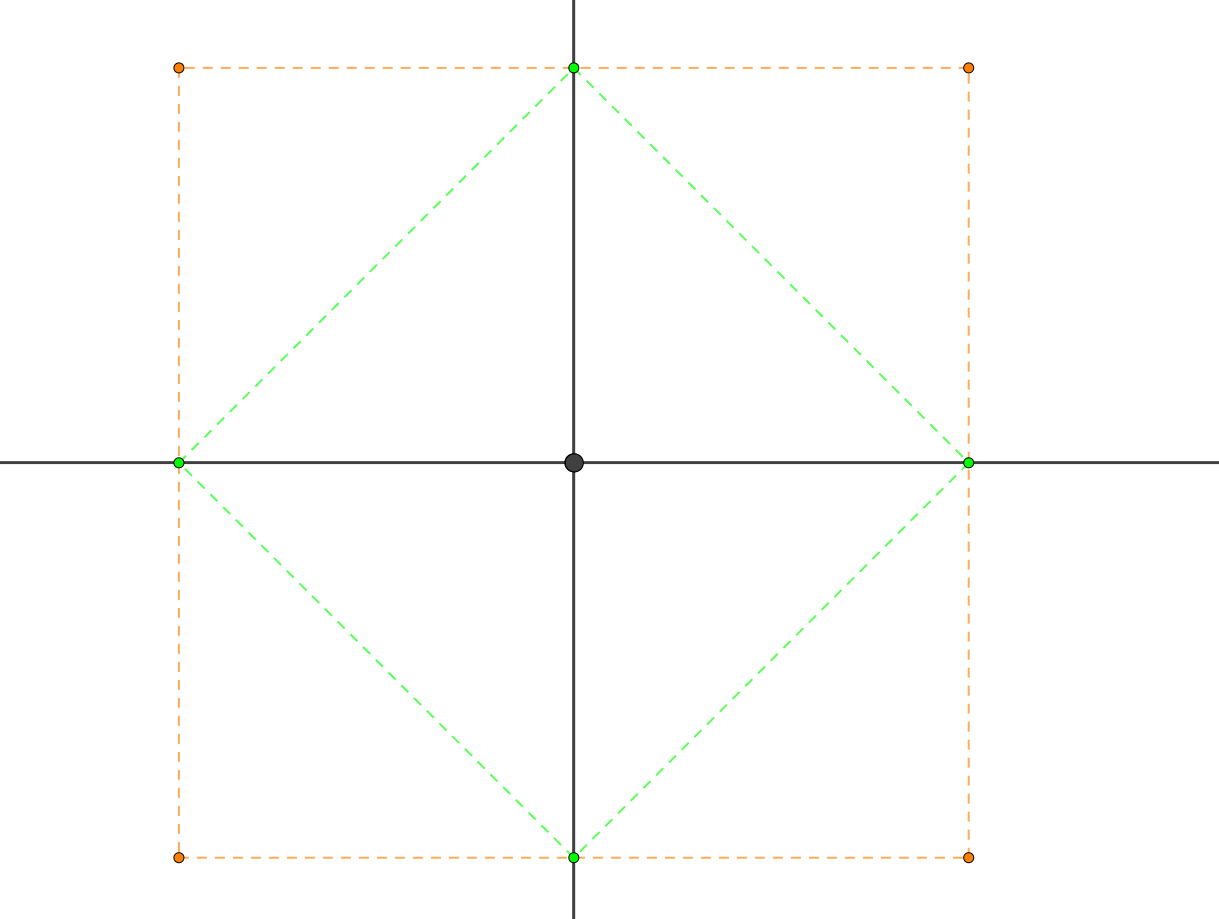

#### 4. Face Split

A megfelelő csúcsok létrehozása után az utolsó lépés az új lapok kialakítása. Ennek során először minden face point és azonos lapon található edge point közé egy új élt húzunk.

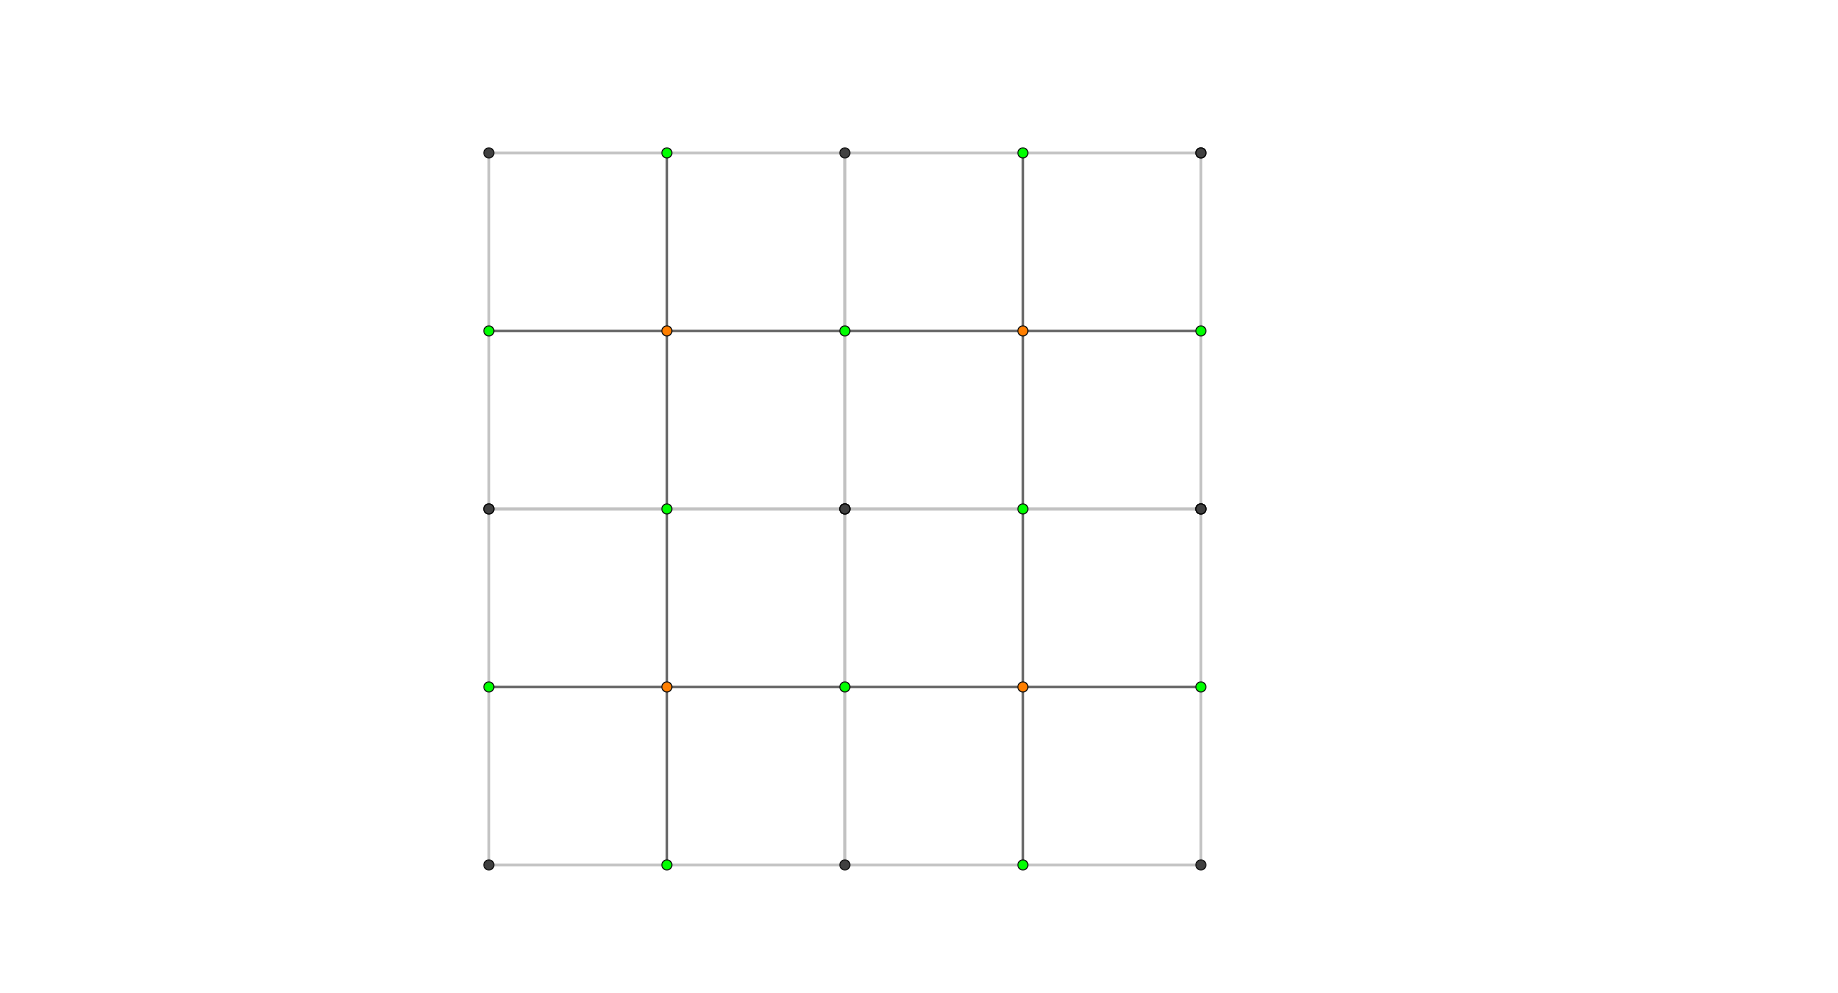

Végül az eredetileg is meglevő csúcsok és a velük szomszédps edge pointok között húzunk éleket.

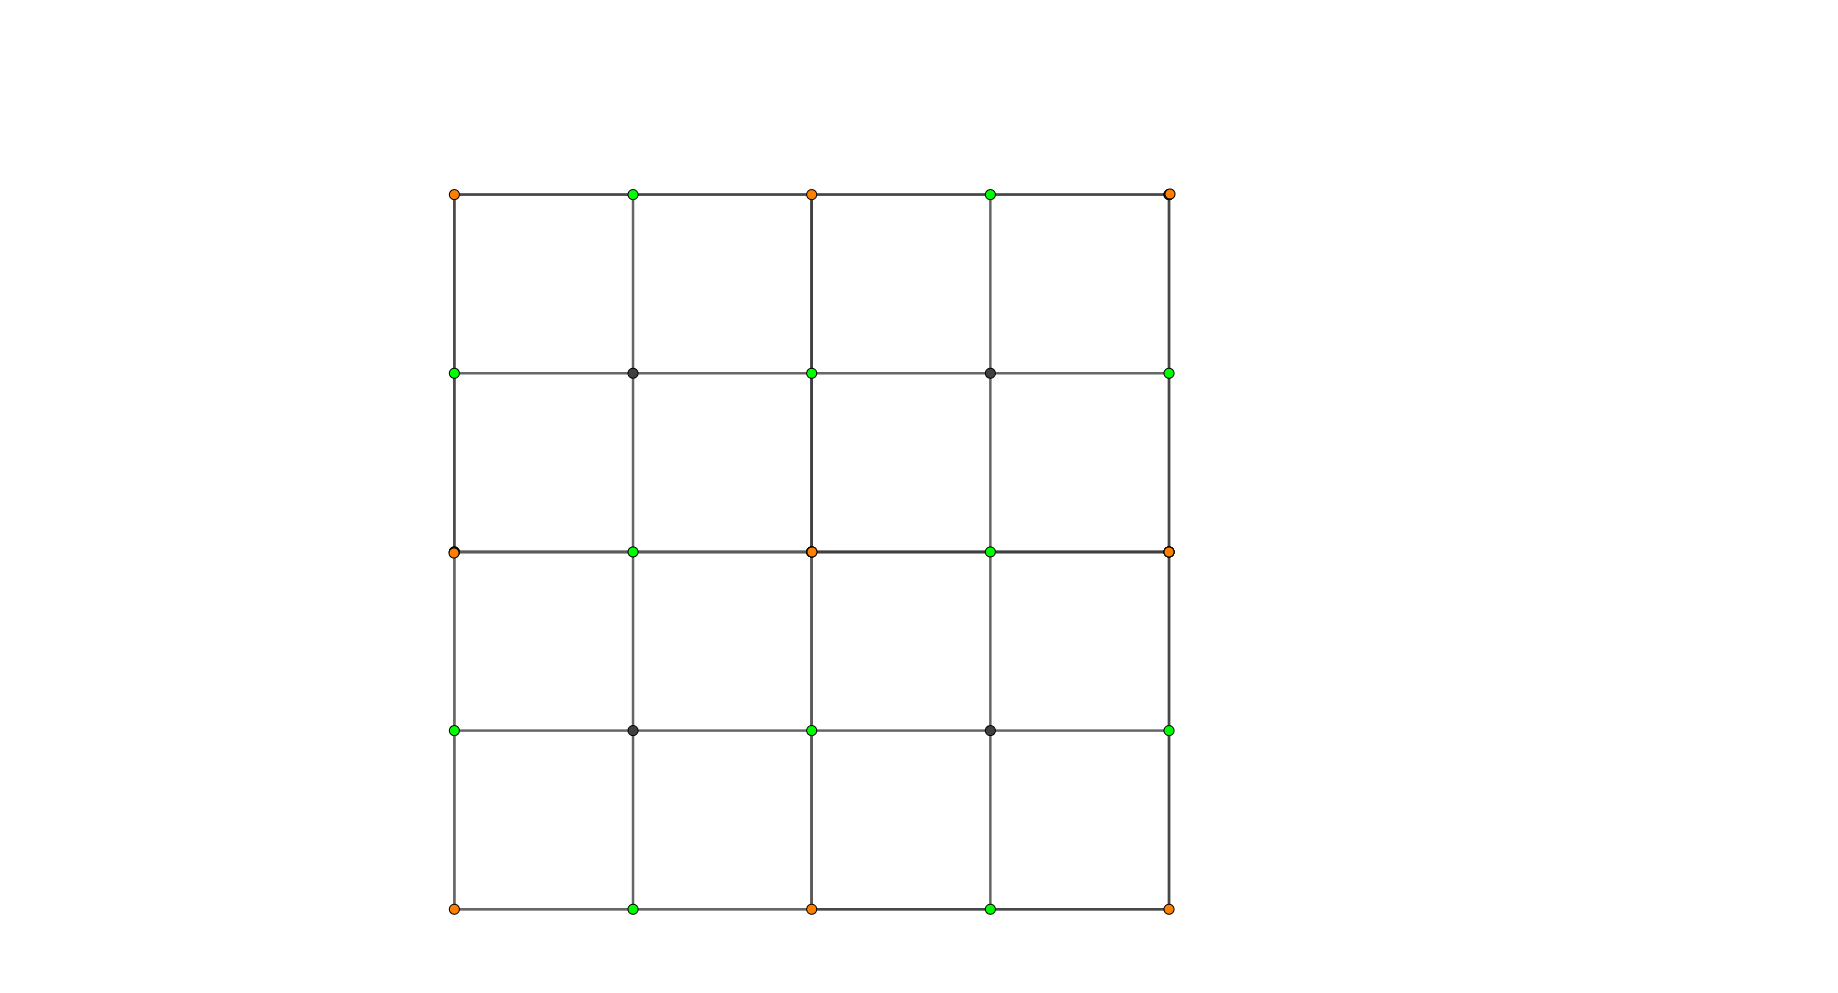

#### Demonstráció

A demonstráció a Catmull-Clark Subdivision séma működését mutatja be egy kockán.

In [7]:
addScript('js/catmull-clark-subdivision', 'catmull-clark-subdivision')

### Kobbelt $\sqrt{3}$-Subdivision

A *Leif Kobbelt* által kidolgozott $\sqrt{3}$-Subdivision kakukktojás, abban a tekintetben, hogy nem mondható szigorúan primál subdivision eljárásnak, hiszen az egyes finomítások teljesen átrendezik a lapok éleit. A Loop Subdivisionnel megegyezően ez az eljárás is csak háromszögekkel képes dolgozni, azonban az egyes finomítások kevesebb új lapot generálnak, nem fog nagyon gyorsan óriásira nőni az új csúcsok és lapok száma.

#### 1. Centroids

A Catmull-Clarkhoz hasonlóan első lépés új csúcsok létrehozása a háromszögek súlypontjaiból.

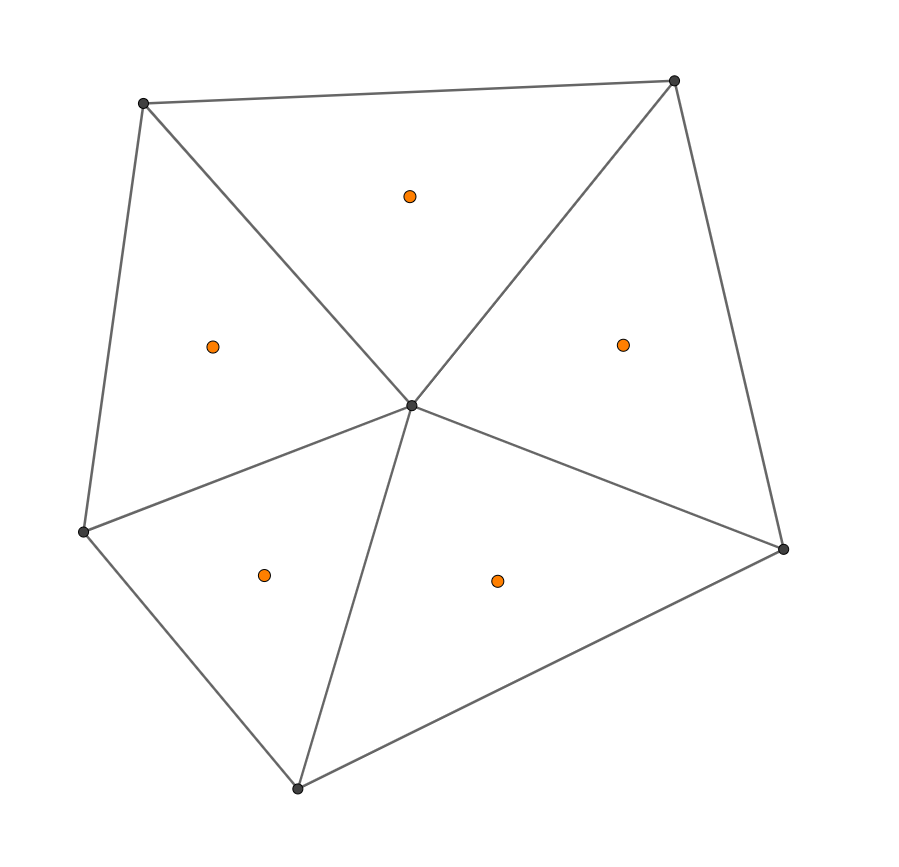

#### 2. Vertex Perturbation

Az új csúcsok hozzáadását követően mozdítsuk el a meglevőeket! Ezt a Loophoz hasonlóan, a szomszédos csúcsok pozíciójának átlagolásával tesszük.

#### 3. Flip Edges

A harmadik, *flip edges* fázis a kulcsmozzanat. Ez azt jelenti, hogy az eddig az eredeti csúcsok között futó éleket megfordítjuk, úgy, hogy az újonnan létrejött súlypontokat kössék össze.

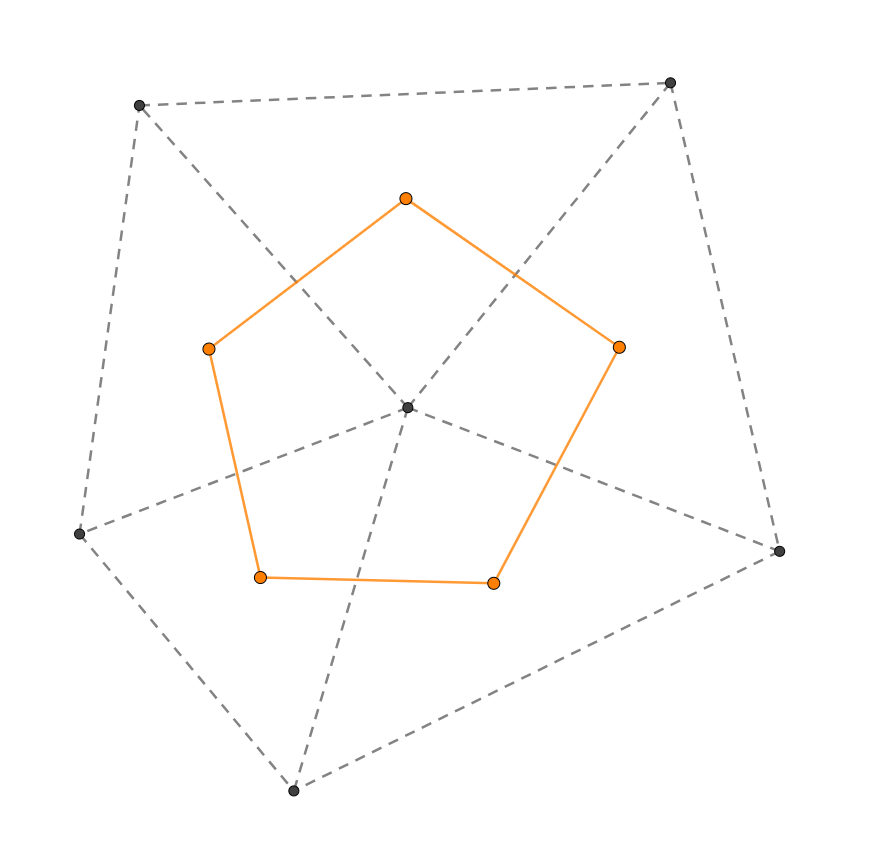

#### 4. Connect Original Vertices

Az új lapok kialakításának befejező lépése az új csúcsok és a régiek összekötése. Minden súlypont, és az adott lapot eredetileg alkotó három csúcs között egy új élt alakítunk ki.

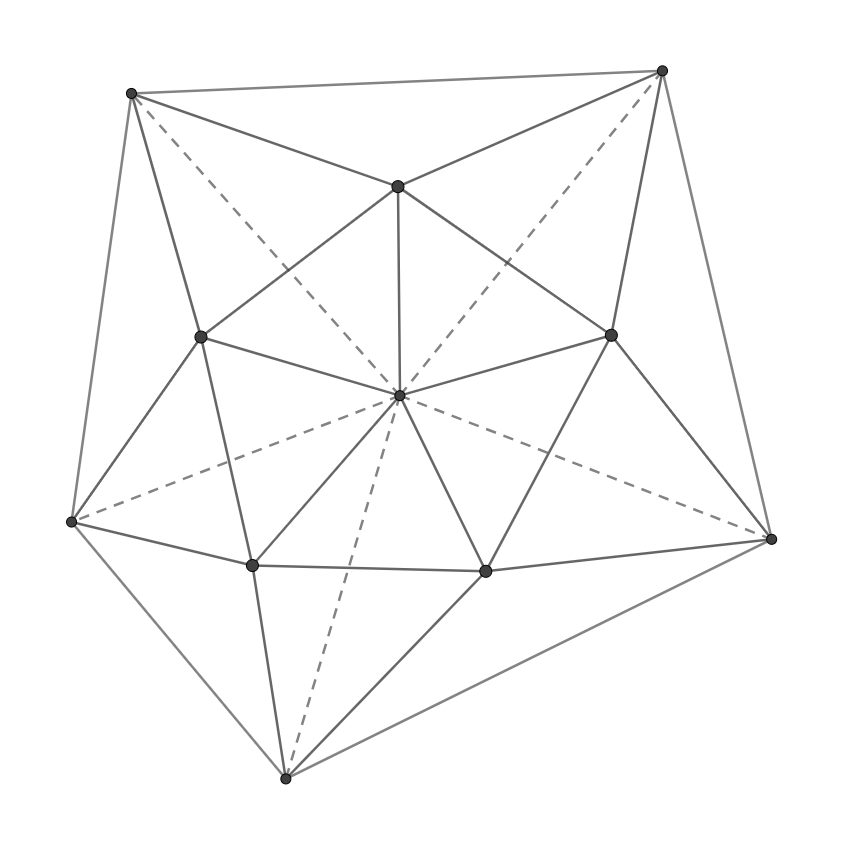

#### Demonstráció

A demonstráció a Kobbelt $\sqrt{3}$-Subdivision működését mutatja be egy kockán.

In [8]:
addScript('js/kobbelt-subdivision', 'kobbelt-subdivision')

## Források

* *SIGGRAPH 2000 Course Notes: Subdivision for Modeling and Animation* https://mrl.nyu.edu/publications/subdiv-course2000/coursenotes00.pdf
* J. F. Hughes, A. van Dam (2013). *Computer Graphics: Principles and Practice*, Third Edition, Chapter 23W, pp. 168-171. http://dept.cs.williams.edu/~morgan/cgpp/file/cgpp3e_ch23W.pdf
* C. T. Loop (1987). *Smooth Subdivision Surfaces Based on Triangles* https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/thesis-10.pdf
* C.-K. Shene (2010). *Subdivision Techniques* https://pages.mtu.edu/~shene/COURSES/cs3621/SLIDES/Subdivision.pdf
* L. Kobbelt (2010). *$\sqrt{3}$-Subdivision* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.43.1955&rep=rep1&type=pdf

In [9]:
def styling():
    styles = open("../../styles/custom.html", "r").read()
    return HTML(styles)
styling()
